In [119]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### <u>Sample function</u>
$
f(x) = 3x^2 - 4x + 5
$

In [120]:
def f(x):
    return 3*x**2 - 4*x + 5

In [121]:
f(3.0)

20.0

In [122]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

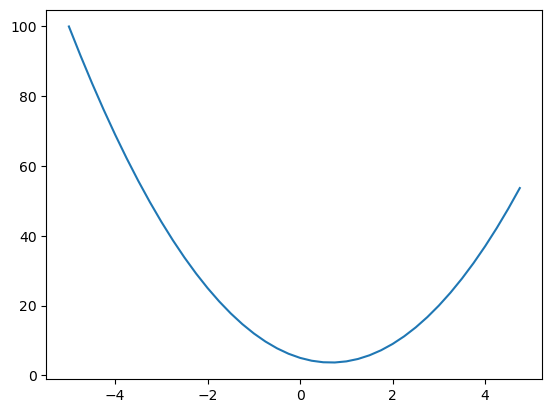

In [123]:
plt.plot(xs, ys)

#### Derivative of 
$f(x) = 3x^2 - 4x + 5$

is

$6x -4$

In [124]:
h = 0.000001
x = 3.0
(f(x+h)-f(x))/h

14.000003002223593

In [125]:
h = 0.000001
x = -3.0
(f(x+h)-f(x))/h

-21.999997002808414

In [126]:
h = 0.000001
x = 2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

In [127]:
# more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [128]:
h = 0.0001

#input
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

In [129]:
#w.r.t. a
d2 = (a+h)*b + c

print('d1', d1)
print('d2', d2)
print('d2-d1', (d2-d1))
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
d2-d1 -0.0003000000000010772
slope -3.000000000010772


In [130]:
#w.r.t. b
d2 = a*(b+h) + c

print('d1', d1)
print('d2', d2)
print('d2-d1', (d2-d1))
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
d2-d1 0.00020000000000042206
slope 2.0000000000042206


In [131]:
#w.r.t. c
d2 = a*b + (c + h)

print('d1', d1)
print('d2', d2)
print('d2-d1', (d2-d1))
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
d2-d1 9.999999999976694e-05
slope 0.9999999999976694


In [132]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(2.0)
a

Value(data=2.0)

In [133]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(2.0)
b = Value(-3.0)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [134]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data)
        return out

a = Value(2.0)
b = Value(-3.0)
a + b

Value(data=-1.0)

In [135]:
a.__add__(b)

Value(data=-1.0)

In [136]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):        
        out = Value(self.data * other.data)
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d

Value(data=4.0)

In [137]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):        
        out = Value(self.data * other.data, (self, other))
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [138]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
x = a * b
d = x + c
x._prev

{Value(data=-3.0), Value(data=2.0)}

In [139]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):        
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
x = a * b
d = x + c
d._op

'+'

In [140]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
  
    for n in nodes:
        uid = str(id(n))
    
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ data: %.4f }" % (n.data), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

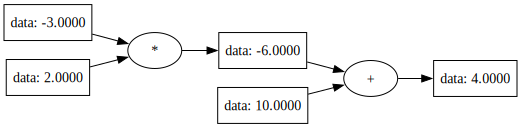

In [141]:
draw_dot(d)

In [142]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):        
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'

In [143]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
  
    for n in nodes:
        uid = str(id(n))
    
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data: %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

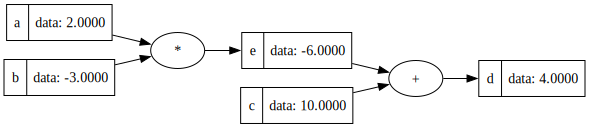

In [144]:
draw_dot(d)

In [145]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

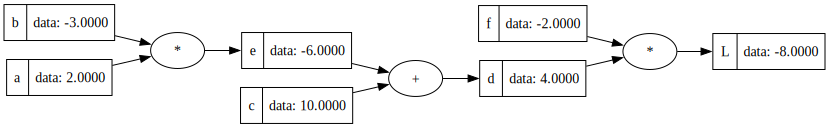

In [146]:
draw_dot(L)

$L = (a \times b + c) \times f$

In [147]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): 
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):        
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [148]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
  
    for n in nodes:
        uid = str(id(n))
    
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data: %.4f | grad: %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [149]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

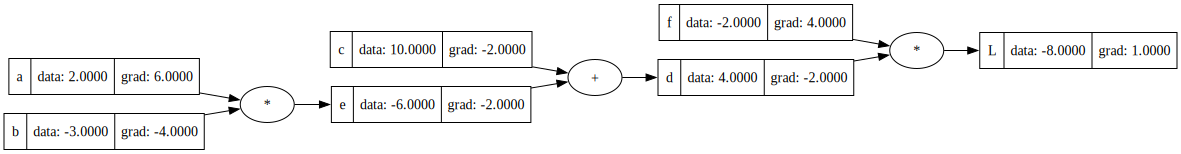

In [155]:
draw_dot(L)

In [151]:
L.grad = 1.0

L = d * f

dL/dd = f = -2.0

=> (f(x+h) - f(x))/h = ((d+h)*f - d*f)/h = f

dL/df = d = 4.0

In [152]:
f.grad = 4.0
d.grad = -2.0

d = c + e

dL/dd = -2.0

dd/dc = 1.0

dd/de = 1.0

dL/dc = dL/dd * dd/dc = -2.0 * 1 = -2.0

dL/de = dL/dd * dd/de = -2.0 * 1 = -2.0

##### <u>Chain Rule</u>

$z = f (y)$

$y = f(x)$

$\frac {dz}{dy} = \frac {dz}{dx} \times \frac {dy}{dx}$

In [153]:
c.grad = -2.0
e.grad = -2.0

e = a * b

dL/de = -2.0

de/da = b = -3.0

de/db = a = 2.0

dL/da = dL/de * de/da = -2.0 * -3.0 = 6.0

dL/db = dL/de * de/db = -2.0 * 2.0 = -4.0

In [154]:
a.grad = 6.0
b.grad = -4.0

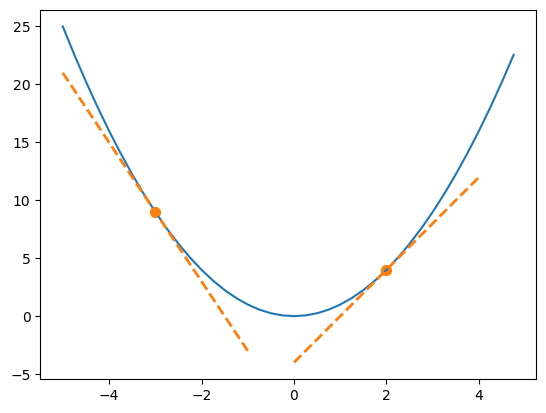

In [219]:
# Let's understand the gradient and it's impact

def f(x):
    return x**2

def slope(x): 
    return 2*x

def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

xs = np.arange(-5,5,0.25)
ys = f(xs)
ys
plt.plot(xs,ys)

x1 = -3
y1 = f(x1)

x2 = 2
y2 = f(x2)

xrange1 = np.linspace(x1-2, x1+2, 50)
xrange2 = np.linspace(x2-2, x2+2, 50)

plt.scatter(x1, y1, color='C1', s=50)
plt.scatter(x2, y2, color='C1', s=50)
plt.plot(xrange1, line(xrange1, x1, y1), 'C1--', linewidth = 2)
plt.plot(xrange2, line(xrange2, x2, y2), 'C1--', linewidth = 2)

In [156]:
# Now change the gradient (increase) in the positive direction and we expect the output to go up

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad 
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
  
e = a*b
d = e + c
L = d * f
print(L.data)

-7.286496


In [157]:
def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')  
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0 , label='f')
    L = d * f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1)/h)

lol()

6.000000000000227


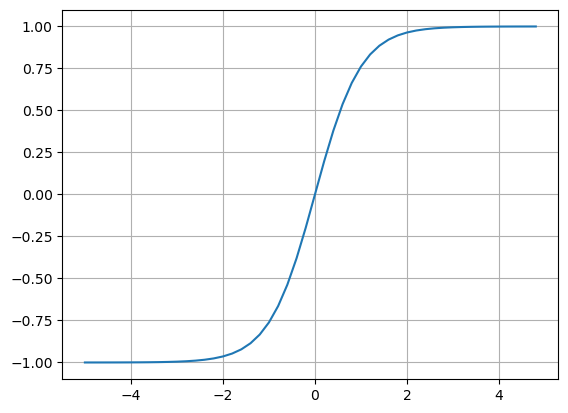

In [158]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

$output = \sum_i x_iw_i + b $

$E.g.,\ where\ i=2,$

$o = x1 \times w1 + x2 \times w2 + b$

In [159]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.7, label='b')

# x1*w1
x1w1 = x1*w1; x1w1.label = 'x1 x w1'

# x2*w2
x2w2 = x2*w2; x2w2.label = 'x2 x w2'

# x1*w1 + x2*w2
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1 x w1 + x2 x w2'

# x1*w1 + x2*w2 + b
n = x1w1x2w2 + b; n.label = 'n'
n

Value(data=0.7000000000000002)

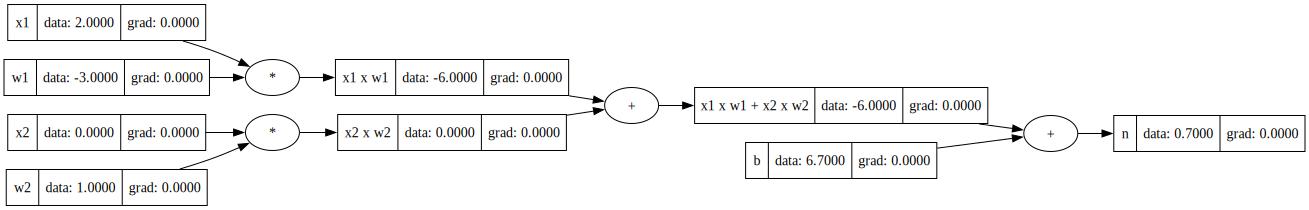

In [160]:
draw_dot(n)

$output = tanh( \sum_i x_iw_i + b) $

$E.g.,\ where\ i=2,$

$o = tanh(x1 \times w1 + x2 \times w2 + b)$

In [161]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label 

    def __repr__(self): 
        return f"Value(data={self.data})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):        
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

In [162]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1
x1w1 = x1*w1; x1w1.label = 'x1 x w1'

# x2*w2
x2w2 = x2*w2; x2w2.label = 'x2 x w2'

# x1*w1 + x2*w2
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1 x w1 + x2 x w2'

# x1*w1 + x2*w2 + b
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

Value(data=0.7071067811865476)

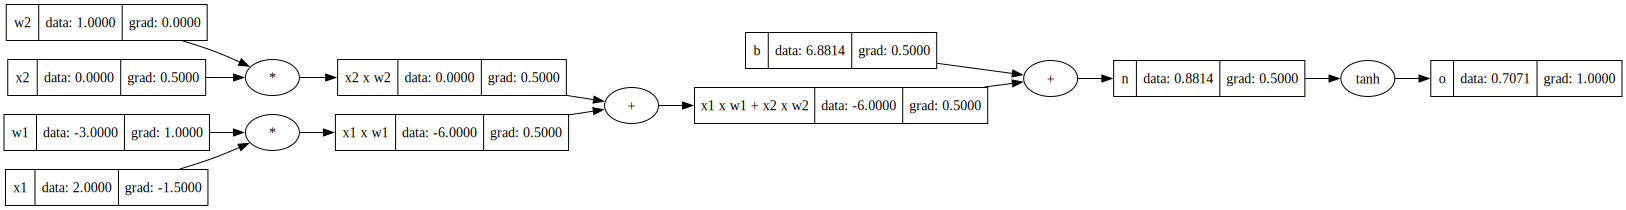

In [172]:
draw_dot(o)

In [171]:
o.grad = 1.0

$o = tanh(n)$

$do/dn = 1 - tanh(n)^2 = 1 - o^2$

In [165]:
1 - o.data**2

0.4999999999999999

In [166]:
n.grad = 0.5

In [167]:
x1w1x2w2.grad =0.5
b.grad = 0.5

In [168]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [169]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [173]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, op={self._op})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):        
        out = Value(self.data  * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

In [174]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1
x1w1 = x1*w1; x1w1.label = 'x1 x w1'

# x2*w2
x2w2 = x2*w2; x2w2.label = 'x2 x w2'

# x1*w1 + x2*w2
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1 x w1 + x2 x w2'

# x1*w1 + x2*w2 + b
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

Value(data=0.7071067811865476, op=tanh)

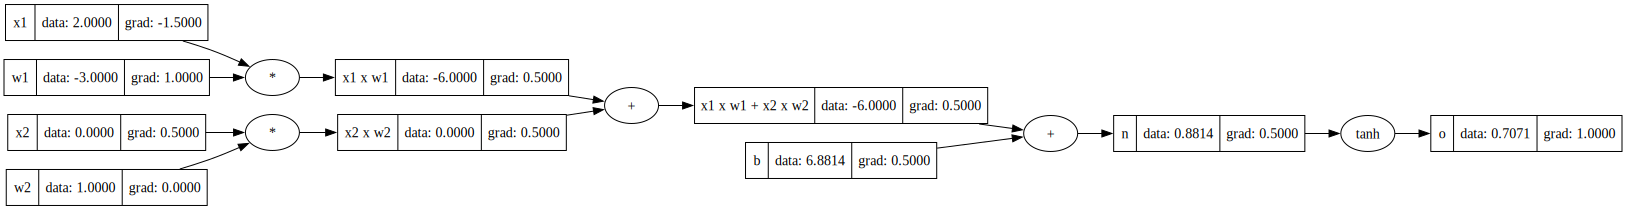

In [181]:
draw_dot(o)

In [176]:
o.grad = 1.0

In [177]:
o._backward()

In [178]:
n._backward()

In [179]:
x1w1x2w2._backward()

In [180]:
x1w1._backward()
x2w2._backward()

In [182]:
topo=[]
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=2.0, op=),
 Value(data=-3.0, op=),
 Value(data=-6.0, op=*),
 Value(data=0.0, op=),
 Value(data=1.0, op=),
 Value(data=0.0, op=*),
 Value(data=-6.0, op=+),
 Value(data=6.881373587019543, op=),
 Value(data=0.8813735870195432, op=+),
 Value(data=0.7071067811865476, op=tanh)]

In [183]:
o.grad = 1.0

topo=[]
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

In [184]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, op={self._op})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):        
        out = Value(self.data  * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo=[]
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [185]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1
x1w1 = x1*w1; x1w1.label = 'x1 x w1'

# x2*w2
x2w2 = x2*w2; x2w2.label = 'x2 x w2'

# x1*w1 + x2*w2
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1 x w1 + x2 x w2'

# x1*w1 + x2*w2 + b
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

Value(data=0.7071067811865476, op=tanh)

In [187]:
o.backward()

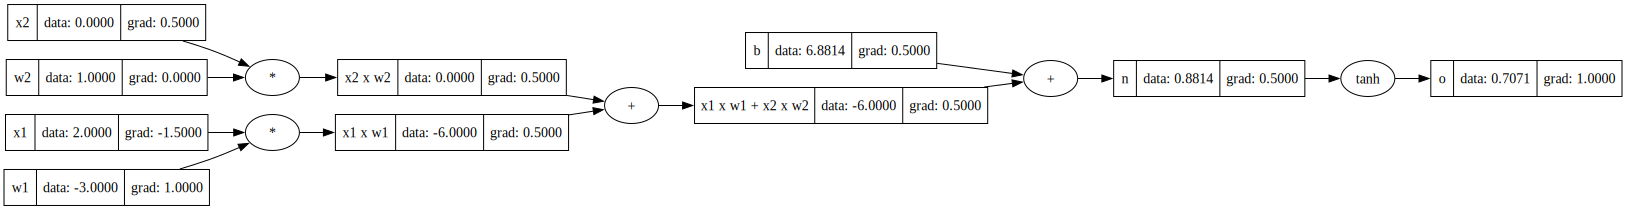

In [188]:
draw_dot(o)

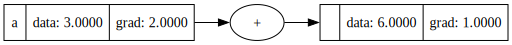

In [192]:
a = Value(3.0, label='a')
b = a + a; b.lable = 'b'
b.backward()
draw_dot(b)

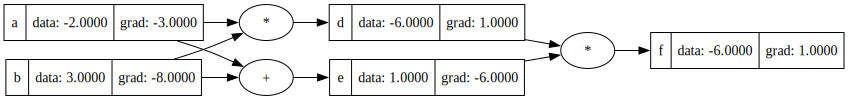

In [193]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [191]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, op={self._op})"

    def __add__(self, other):     
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):        
        out = Value(self.data  * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo=[]
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()